<img src="https://raw.githubusercontent.com/ProjectPythiaCookbooks/radar-cookbook/main/thumbnail.png" width=500 alt="ARM Logo"></img>

# Py-ART Basics
---

## Overview
   
Within this notebook, we will cover:

1. Reading NEXRAD data using Py-ART
1. An overview of the `pyart.Radar` object
1. Create a Plot of our Radar Data


## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |

- **Time to learn**: 30 minutes
---

## Imports

In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np


import pyart

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Read NEXRAD Level 2 Data

- Let's start first with NEXRAD Level 2 data
    - which is ground-based radar data collected by the National Oceanic and Atmospheric Administration (NOAA), as a part of the National Weather Service

- Configure our Filepath for NEXRAD Level 2 Data
    - We will access data from the [**noaa-nexrad-level2** bucket](https://registry.opendata.aws/noaa-nexrad/), with the data organized as:
    - ``s3://noaa-nexrad-level2/year/month/date/radarsite/{radarsite}{year}{month}{date}_{hour}{minute}{second}_V06``

- Where in our case, we are using a sample data file from Lemont, Illinois (KLOT)
    - on March 31, 2023, at HHMM:SS UTC. This means our path would look like:

In [4]:
aws_nexrad_level2_file = ("s3://noaa-nexrad-level2/2023/03/31/KLOT/KLOT20230331_080309_V06")

### Reading data in using `pyart.io.read_nexrad_archive`

When reading in a radar file, we could use use the `pyart.io.read` module.

`pyart.io.read` can read a variety of different radar formats, such as Cf/Radial, LASSEN, and more. 
The documentation on what formats can be read by Py-ART can be found here:

* [Py-ART IO Documentation](https://arm-doe.github.io/pyart/API/generated/pyart.io.html)

For most file formats listed on the page, using `pyart.io.read` should suffice since Py-ART has the ability to automatically detect the file format.

For this file, we will `pyart.io.read_nexrad_archive` to read the NEXRAD data from the S3 bucket

In [5]:
pyart.io.read_nexrad_archive?

Signature:
pyart.io.read_nexrad_archive(
    filename,
    field_names=None,
    additional_metadata=None,
    file_field_names=False,
    exclude_fields=None,
    include_fields=None,
    delay_field_loading=False,
    station=None,
    scans=None,
    linear_interp=True,
    storage_options={'anon': True},
    **kwargs,
)
Docstring:
Read a NEXRAD Level 2 Archive file.

Parameters
----------
filename : str
    Filename of NEXRAD Level 2 Archive file. The files hosted by
    at the NOAA National Climate Data Center [1]_ as well as on the
    UCAR THREDDS Data Server [2]_ have been tested. Other NEXRAD
    Level 2 Archive files may or may not work. Message type 1 file
    and message type 31 files are supported.
field_names : dict, optional
    Dictionary mapping NEXRAD moments to radar field names. If a
    data type found in the file does not appear in this dictionary or has
    a value of None it will not be placed in the radar.fields dictionary.
    A value of None, the default, wil

### Let's read in the selected KLOT data

When we read this in, we get a [`pyart.Radar` object](https://arm-doe.github.io/pyart/API/generated/pyart.core.Radar.html#pyart.core.Radar)!

In [6]:
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file)
radar

### Investigate the [`pyart.Radar` object](https://arm-doe.github.io/pyart/API/generated/pyart.core.Radar.html#pyart.core.Radar)

Within this [`pyart.Radar` object](https://arm-doe.github.io/pyart/API/generated/pyart.core.Radar.html#pyart.core.Radar) object are the actual data fields.

This is where data such as reflectivity and velocity are stored.

To see what fields are present we can add the fields and keys additions to the variable where the radar object is stored.

In [7]:
radar.fields.keys()

dict_keys(['cross_correlation_ratio', 'differential_phase', 'clutter_filter_power_removed', 'reflectivity', 'velocity', 'differential_reflectivity', 'spectrum_width'])

#### Extract a sample data field

The fields are stored in a dictionary, each containing coordinates, units and more.
All can be accessed by just adding the fields addition to the radar object variable.

For an individual field, we add a string in brackets after the fields addition to see
the contents of that field.

Let's take a look at `'corrected_reflectivity'`, which is a common field to investigate.

In [8]:
print(radar.fields['reflectivity'])

{'units': 'dBZ', 'standard_name': 'equivalent_reflectivity_factor', 'long_name': 'Reflectivity', 'valid_max': 94.5, 'valid_min': -32.0, 'coordinates': 'elevation azimuth range', '_FillValue': -9999.0, 'data': masked_array(
  data=[[-4.0, 2.5, 6.0, ..., --, --, --],
        [-13.5, 24.5, 28.5, ..., --, --, --],
        [-4.0, -1.0, 1.5, ..., --, --, --],
        ...,
        [-7.0, -9.5, -10.0, ..., --, --, --],
        [-7.5, -9.0, -6.5, ..., --, --, --],
        [-7.0, -3.0, -12.5, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)}


We can go even further in the dictionary and access the actual reflectivity data.

We use add `'data'` at the end, which will extract the **data array** (which is a masked numpy array) from the dictionary.

In [10]:
reflectivity = radar.fields['reflectivity']['data']
print(type(reflectivity), reflectivity)

<class 'numpy.ma.core.MaskedArray'> [[-4.0 2.5 6.0 ... -- -- --]
 [-13.5 24.5 28.5 ... -- -- --]
 [-4.0 -1.0 1.5 ... -- -- --]
 ...
 [-7.0 -9.5 -10.0 ... -- -- --]
 [-7.5 -9.0 -6.5 ... -- -- --]
 [-7.0 -3.0 -12.5 ... -- -- --]]


Lets' check the size of this array...

In [11]:
reflectivity.shape

(8280, 1832)

This reflectivity data array, numpy array, is a two-dimensional array with dimensions:
- Gates (number of samples away from the radar)
- Rays (direction around the radar)

In [12]:
print(radar.nrays, radar.ngates)

8280 1832


If we wanted to look the 300th ray, at the second gate, we would use something like the following:

In [13]:
print(reflectivity[300, 2])

-9.0


## Plotting our Radar Data

### An Overview of Py-ART Plotting Utilities

Now that we have loaded the data and inspected it, the next logical thing to do is to visualize the data! Py-ART's visualization functionality is done through the objects in the [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) module.

In Py-ART there are 4 primary visualization classes in pyart.graph:

* [RadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html)
* [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html)
* [AirborneRadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.AirborneRadarDisplay.html)

Plotting grid data
* [GridMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.html)

### Use the [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) with our data

For the this example, we will be using `RadarMapDisplay`, using Cartopy to deal with geographic coordinates.


We start by creating a figure first.

In [14]:
fig = plt.figure(figsize=[10, 10])

<Figure size 1000x1000 with 0 Axes>

Once we have a figure, let's add our `RadarMapDisplay`

In [15]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

Adding our map display without specifying a field to plot **won't do anything** we need to specifically add a field to field using `.plot_ppi_map()`, which creates a Plan Position Indicator (PPI) plot.

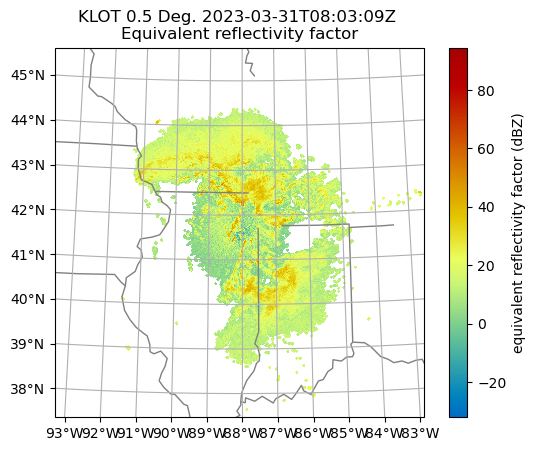

In [16]:
display.plot_ppi_map('reflectivity')

By default, it will plot the elevation scan, the the default colormap from `Matplotlib`... let's customize!

We add the following arguements:
- `sweep=3` - The fourth elevation scan (since we are using Python indexing)
- `vmin=-20` - Minimum value for our plotted field/colorbar
- `vmax=60` - Maximum value for our plotted field/colorbar
- `projection=ccrs.PlateCarree()` - Cartopy latitude/longitude coordinate system
- `cmap='pyart_ChaseSpectral'` - Colormap to use, selecting one provided by [Py-ART colormaps](https://arm-doe.github.io/pyart/examples/plotting/plot_choose_a_colormap.html?highlight=colormaps)
- `lat_lines` - Which lines to plot for latitude
- `lon_lines` - Which liens to plot for longitude

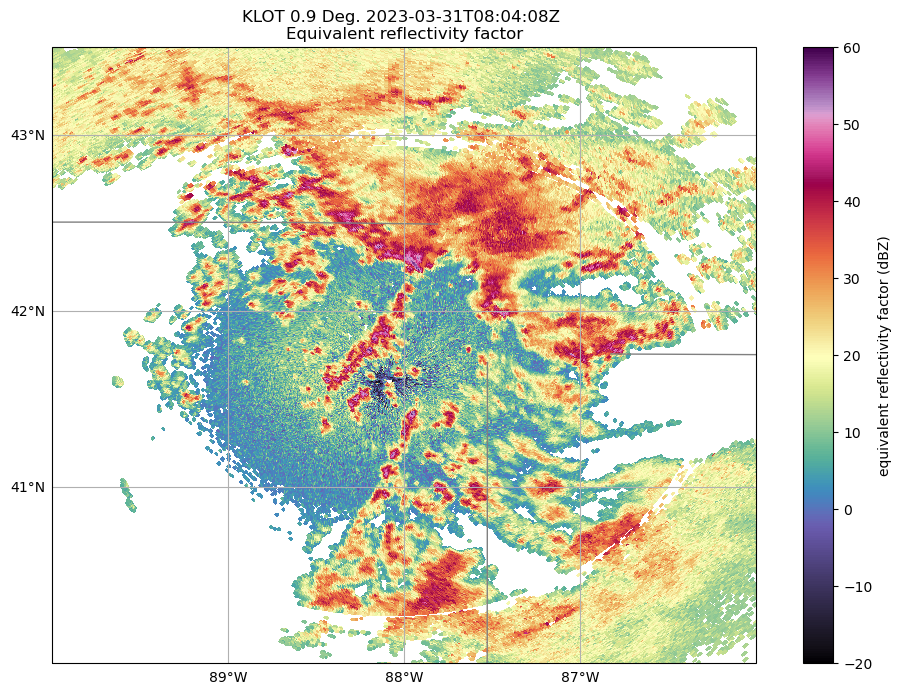

In [36]:
fig = plt.figure(figsize=[12, 8])
axarr = plt.subplot(111, projection=ccrs.PlateCarree())

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=axarr,
                     lat_lines = np.arange(36, 47, 1),
                     lon_lines = np.arange(-94, -83, 1),
                     cmap='pyart_ChaseSpectral')
# Note I can change the plot limits as well!
axarr.set_xlim([-90, -86])
axarr.set_ylim([40, 43.5])
plt.savefig("sample-ppi-map.png", dpi=300)

You can change many parameters in the graph by changing the arguments to plot_ppi_map. As you can recall from earlier. simply view these arguments in a Jupyter notebook by typing:

In [19]:
display.plot_ppi_map?

Signature:
display.plot_ppi_map(
    field,
    sweep=0,
    mask_tuple=None,
    vmin=None,
    vmax=None,
    cmap=None,
    norm=None,
    mask_outside=False,
    title=None,
    title_flag=True,
    colorbar_flag=True,
    colorbar_label=None,
    colorbar_orient='vertical',
    ax=None,
    fig=None,
    lat_lines=None,
    lon_lines=None,
    projection=None,
    min_lon=None,
    max_lon=None,
    min_lat=None,
    max_lat=None,
    width=None,
    height=None,
    lon_0=None,
    lat_0=None,
    resolution='110m',
    shapefile=None,
    shapefile_kwargs=None,
    edges=True,
    gatefilter=None,
    filter_transitions=True,
    embellish=True,
    add_grid_lines=True,
    raster=False,
    ticks=None,
    ticklabs=None,
    alpha=None,
    edgecolors='face',
    **kwargs,
)
Docstring:
Plot a PPI volume sweep onto a geographic map.

Parameters
----------
field : str
    Field to plot.
sweep : int, optional
    Sweep number to plot.

Other Parameters
----------------
mask_tuple 

For example, let's change the colormap to something different

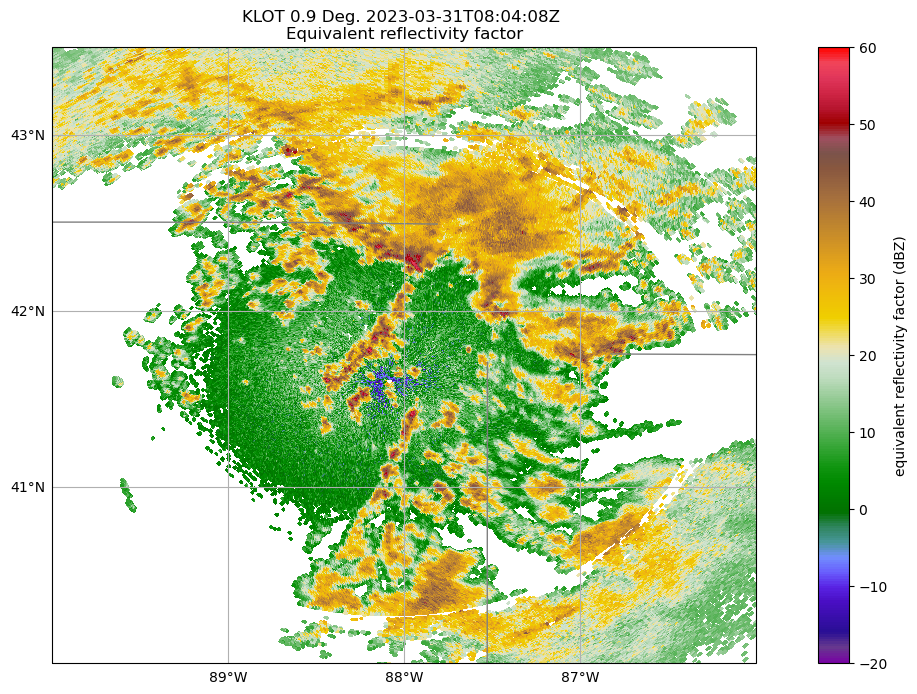

In [39]:
fig = plt.figure(figsize=(16, 8))
axarr = plt.subplot(111, projection=ccrs.PlateCarree())

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=axarr,
                     lat_lines = np.arange(40, 43.5, 1),
                     lon_lines = np.arange(-90, -86, 1),
                     cmap='pyart_Carbone42')
# Note I can change the plot limits as well!
axarr.set_xlim([-90, -86])
axarr.set_ylim([40, 43.5])
plt.show()

Or, let's view a different elevation scan! To do this, change the sweep parameter in the plot_ppi_map function.

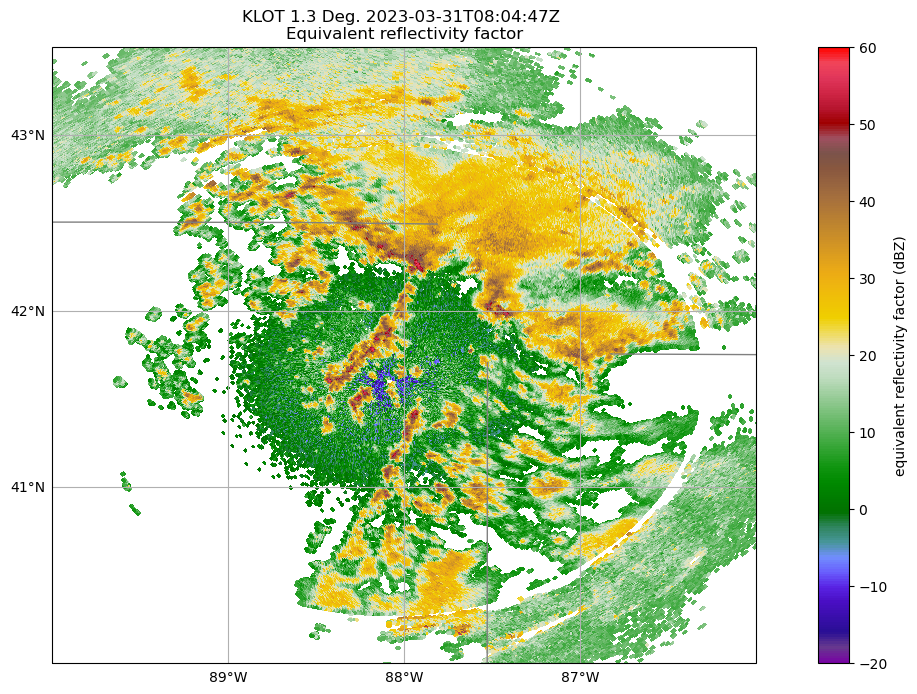

In [42]:
fig = plt.figure(figsize=(16, 8))
axarr = plt.subplot(111, projection=ccrs.PlateCarree())

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=5,
                     vmin=-20,
                     vmax=60,
                     ax=axarr,
                     cmap='pyart_Carbone42')
# Note I can change the plot limits as well!
axarr.set_xlim([-90, -86])
axarr.set_ylim([40, 43.5])

plt.show()

## Plotting an RHI
Another common plot that is requested by the radar community is a **Range Height Indicator (RHI)** Plot. 

Fortunately, Py-ART has a utility to help us create one of these from our radar!

### Add a "Pseudo-RHI" from our PPI data
But let's say we wanted to compare the vertical resolution we get from an RHI, compared to PPI... we can do this with Py-ART!

In [43]:
# Create a cross section at our 334 degree azimuth
xsect = pyart.util.cross_section_ppi(radar, [328])

Now, notice how coarse the resolution of the precipitation region!

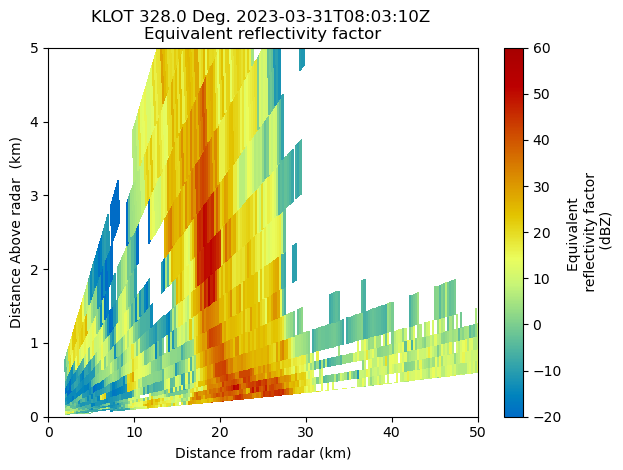

In [47]:
colorbar_label = 'Equivalent \n reflectivity factor \n (dBZ)'
display = pyart.graph.RadarDisplay(xsect)
display.plot('reflectivity', 0, vmin=-20, vmax=60, colorbar_label=colorbar_label)
plt.ylim(0, 5)
plt.xlim(0, 50)
plt.tight_layout()

---
## Summary
Within this notebook, we covered the basics of working with radar data using `pyart`, including:
- Reading in a NEXRAD Level 2 KLOT file using `pyart.io.read_nexrad_archive`
- Investigating the `Radar` object
- Visualizing radar data using the `RadarMapDisplay`

### What's Next
In the next few notebooks, we walk through gridding radar data, applying data cleaning methods, and advanced visualization methods!

## Resources and References
Py-ART essentials links:

* [Landing page](https://arm-doe.github.io/pyart/)
* [Examples](https://arm-doe.github.io/pyart/examples/index.html)
* [Source Code](github.com/ARM-DOE/pyart)
* [Mailing list](groups.google.com/group/pyart-users/)
* [Issue Tracker](github.com/ARM-DOE/pyart/issues)